In [40]:
import pandas as pd 
import matplotlib.pyplot as plt  
import scipy.stats as st 
import numpy as np 
import datetime as dt 

In [41]:
# increase max number of columns and rows visible and read in master data file
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
price_df = pd.read_csv('../all_listings_df')
price_df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,NaN,1.0,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,1 private bath,NaN,2.0,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [42]:
# row count
# price_df

In [43]:
# check for null values in 'price'
null_counts_price = price_df['price'].isna().sum()
print(null_counts_price)

0


In [57]:
# check for null values in 'property_type'
null_counts_price = price_df['property_type'].isna().sum()
print(null_counts_price)

0


In [44]:
# Create property type dataframe with the relevant columns

prop_df = pd.DataFrame(price_df[["id", "price", "property_type", "city"]])

prop_df = prop_df.set_index("id")
prop_df

,price,property_type,city
id,,,
360,90.0,Entire guesthouse,Denver
364,179.0,Entire loft,Denver
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
...,...,...,...
979474665987354279,258.0,Entire home,Portland
980422903985425172,99.0,Entire rental unit,Portland
980439098128842446,165.0,Entire home,Portland


In [45]:
# Use Pandas to calculate the quartiles, IQR, and median
quartiles = prop_df['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

The lower quartile of price is: 99.0
The upper quartile of price is: 249.0
The interquartile range of price is: 150.0
The the median of price is: 154.0 


In [46]:
# check max and min price value
max_value = prop_df['price'].max()
min_value = prop_df['price'].min()
print(max_value)
print(min_value)

99713.0
17.0


In [47]:
# use the IQR to determine upper/lower bound for outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -126.0 could be outliers.
Values above 474.0 could be outliers.


In [48]:
# Verify that upper bound is a number data type.
upper_bound.dtype

dtype('float64')

In [49]:
# look at over 474 prices, sorted in descending order by price. 
# Know that 474 is the outlier boundary, but want to see the data

over_474_df = prop_df.loc[prop_df['price'] >= upper_bound]
over_474_df.to_csv('over_474.csv')
price_counts = over_474_df['price'].value_counts()
price_counts_df = price_counts.reset_index()
price_counts_df.columns = ['price', 'count']
price_counts_df = price_counts_df.sort_values('price', ascending=False)
price_counts_df



,price,count
471,99713.0,1
314,90000.0,1
444,28706.0,1
472,28686.0,1
569,28566.0,1
...,...,...
60,478.0,6
59,477.0,6
14,476.0,11
11,475.0,11


In [50]:
# filter to remove outliers that are above the upper_bound calculated above.

filtered_prop_df = prop_df.loc[prop_df['price'] < upper_bound]
filtered_prop_df


,price,property_type,city
id,,,
360,90.0,Entire guesthouse,Denver
364,179.0,Entire loft,Denver
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
...,...,...,...
979474665987354279,258.0,Entire home,Portland
980422903985425172,99.0,Entire rental unit,Portland
980439098128842446,165.0,Entire home,Portland


In [51]:
# group by property type

grouped_prop = filtered_prop_df.groupby('property_type')
grouped_prop.head()


,price,property_type,city
id,,,
360,90.0,Entire guesthouse,Denver
364,179.0,Entire loft,Denver
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
...,...,...,...
916072760302075056,101.0,Yurt,Portland
927743634178490569,225.0,Tower,Portland
930480412537827205,162.0,Private room in treehouse,Portland


In [52]:
# Calculate the count of property types
# because used groupby above, grouped_prop is no longer a dataframe. 
# Must define property type counts, then use to_frame

prop_type_counts = grouped_prop['property_type'].count()

prop_type_counts_df = prop_type_counts.to_frame('count')


# Sort to see by count in descending order
# confirm datatype for count is integer
# reset index
prop_type_counts_df = prop_type_counts_df.sort_values(by='count',ascending=False)
prop_type_counts_df['count'] = prop_type_counts_df['count'].astype(int)
prop_type_counts_df = prop_type_counts_df.reset_index()
prop_type_counts_df

,property_type,count
0,Entire home,5490
1,Entire rental unit,5133
2,Entire condo,2208
3,Private room in home,1630
4,Entire guest suite,1393
...,...,...
66,Earthen home,1
67,Shared room in vacation home,1
68,Shipping container,1
69,Dome,1


In [53]:
# calculate percentage of total property types. There are over 70 property types, but only about 8 make up 95% of them
# calculating percent to be able to narrow down to the most common property types

total_count = prop_type_counts_df['count'].sum()

prop_type_counts_df['percent of total'] = ((prop_type_counts_df['count'] / total_count) * 100).round(2)
prop_type_counts_df

,property_type,count,percent of total
0,Entire home,5490,25.82
1,Entire rental unit,5133,24.14
2,Entire condo,2208,10.39
3,Private room in home,1630,7.67
4,Entire guest suite,1393,6.55
...,...,...,...
66,Earthen home,1,0.00
67,Shared room in vacation home,1,0.00
68,Shipping container,1,0.00
69,Dome,1,0.00


In [54]:
# Read prop_type_counts_df to csv to be able to see full listing as not visible in above output.
# Use this to make determination of what cutoff will be of the % of total for the analysis.
prop_type_counts_df.to_csv("over_474.csv")

In [55]:
# Filter property type population to only those that comprise over 5% of the total properties.
prop_type_counts_filt_df = prop_type_counts_df.loc[prop_type_counts_df['percent of total'] > 5]
prop_type_counts_filt_df

,property_type,count,percent of total
0,Entire home,5490,25.82
1,Entire rental unit,5133,24.14
2,Entire condo,2208,10.39
3,Private room in home,1630,7.67
4,Entire guest suite,1393,6.55
5,Entire townhouse,1352,6.36


In [16]:
# filter the initial filtered_prop_df to only include top property types determined above:
columns_to_use = ["Entire home", "Entire rental unit", "Entire condo", "Private room in home", "Entire guest suite", "Entire townhouse"]

top_prop_type = filtered_prop_df[filtered_prop_df['property_type'].isin(columns_to_use)]
top_prop_type

,price,property_type,city
id,,,
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
21745,35.0,Private room in home,Denver
31503,103.0,Entire guest suite,Denver
...,...,...,...
979474665987354279,258.0,Entire home,Portland
980422903985425172,99.0,Entire rental unit,Portland
980439098128842446,165.0,Entire home,Portland


In [17]:
# get count of property types by city and average price by property type and by city

top_prop_group = top_prop_type.groupby(['city', 'property_type']).mean().round(2)
top_prop_group

price
city      property_type               
Boston    Entire condo          214.47
          Entire guest suite    146.76
          Entire home           251.61
          Entire rental unit    219.58
          Entire townhouse      290.61
          Private room in home   91.12
Denver    Entire condo          139.93
          Entire guest suite    117.14
          Entire home           202.26
          Entire rental unit    136.66
          Entire townhouse      206.21
          Private room in home   75.06
Nashville Entire condo          199.18
          Entire guest suite    120.36
          Entire home           231.49
          Entire rental unit    184.76
          Entire townhouse      234.37
          Private room in home   78.31
Portland  Entire condo          124.27
          Entire guest suite     98.02
          Entire home           169.69
          Entire rental unit    115.31
          Entire townhouse      172.40
          Private room in home   66.92

In [18]:
# pivot data to be able to create bar chart
# must also reset index to be able to pivot after having done groupby
top_prop_group = top_prop_group.reset_index()
pivoted_prop_type = top_prop_group.pivot(index='city', columns='property_type', values='price')
pivoted_prop_type

property_type,Entire condo,Entire guest suite,Entire home,Entire rental unit,Entire townhouse,Private room in home
city,,,,,,
Boston,214.47,146.76,251.61,219.58,290.61,91.12
Denver,139.93,117.14,202.26,136.66,206.21,75.06
Nashville,199.18,120.36,231.49,184.76,234.37,78.31
Portland,124.27,98.02,169.69,115.31,172.40,66.92


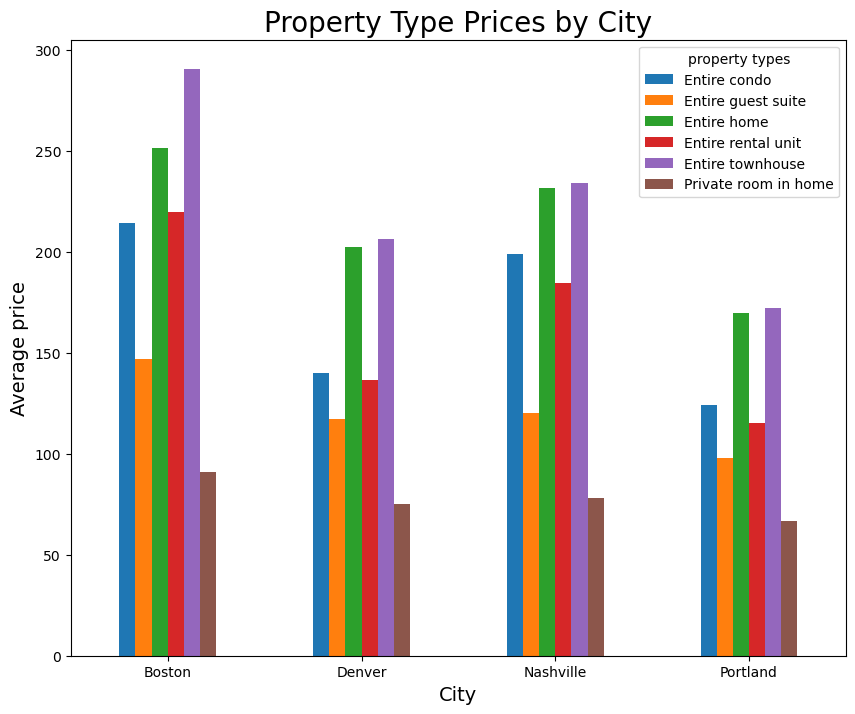

In [63]:
# prepare a bar graph of average price of top property types by city
# this graph has removed the following:
## price outliers over $474
## property types that comprise <5% of total properties
## any rows of data that included nulls in the 

pivoted_prop_type.plot(kind='bar', figsize=(10,8))
plt.title("Property Type Prices by City", fontsize=20)
plt.ylabel("Average price", fontsize=14)
plt.xlabel("City", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='property types')